In [ ]:
from IPython.core.display import display, HTML, Javascript
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Oswald">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Oswald", Arial, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 4px;
        }
        body {
            font-family: "Open Sans", sans-serif;
            }
        </style>
    </head>
</html>
"""

HTML(html_contents)

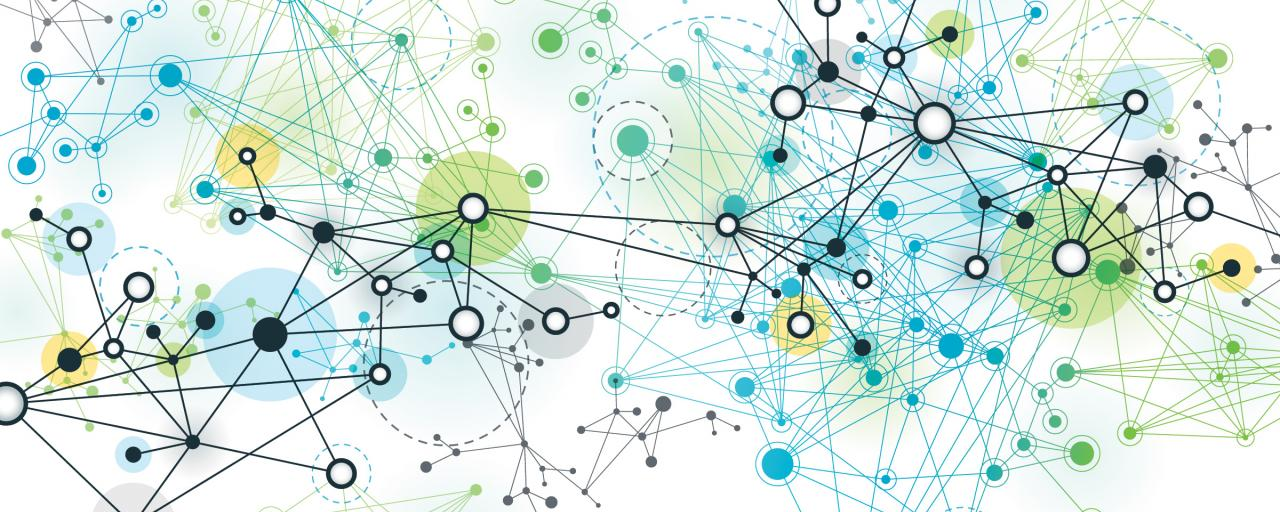

[Image source](https://www.gu.se/data-informationsteknik/data-science-big-data)

<span class="title-section w3-xxxlarge"><b>Machine Learning and Data Science Survey 2021 Analysis</b></span>
<p><span class="w3-tag w3-large"><b>While</b></span> much of the world closed down during the COVID-19 pandemic, the gates opened wide for financing early and late-stage startups in the data and AI space.<a href="#f4" id="a1"><sup>[1]</sup></a>
 In the past year, there’s been less headline-grabbing discussion of futuristic applications of AI (self-driving vehicles, etc.), and a bit less AI hype as a result. Regardless, data and ML/AI-driven application companies have continued to thrive, particularly those focused on enterprise use trend cases. Meanwhile, a lot of the action has been happening behind the scenes on the data and ML infrastructure side, with entirely new categories (data observability, reverse ETL, metrics stores, etc.) appearing or drastically accelerating.<a href="#f3" id="a2"><sup>[2]</sup></a></p>
<p>Insights from Kaggle’s annual user survey focused on working data scientists. This is the 5th year conducting an in-depth user survey & publicly sharing the results. Over 25,000 data scientists and ML engineers submitted responses on their backgrounds and day to day experience – everything from educational details to salaries to preferred technologies and techniques. This notebook is data visualization and analysis of the annual user survey result.</p>

In [ ]:
# This Python 3 environment

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import warnings
import squarify
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib import ticker
import seaborn as sns

# Load Dataset
responses_data = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", dtype=object, low_memory=False)

# <span class="title-section w3-xxlarge">Country</span>
In which country do you currently reside?

In [ ]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 9), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########COUNTRY##########
temp = pd.DataFrame(responses_data.groupby('Q3', dropna=False).size()).reset_index()
temp.columns = ['country', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.query("amount>1")
temp.loc[1, 'country'] = 'USA'
temp.loc[8, 'country'] = 'UK'
temp.loc[27, 'country'] = 'Iran'
for i in range(31,66):
    temp.at[i,'country'] = 'Other'

temp = temp.groupby('country').sum()
temp = temp.query("country!='Other'")
temp = temp.query("pct>1")
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp[0:20]

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(20)]
color_map[0] = "#F2A154" #F2A154 79B4B7
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 20))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['country'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Country",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.5, 'Top 20 Countries', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1-0.8, 'Q3: In which country do you currently reside?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<7:
        x1 = -1
    else:
        x1 = .8
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

<p><span class="w3-tag w3-large"><b>India</b></span> is obviously the number one country of Kaggle's users (28.6%). Second position is the USA (10.2%) with a big gap almost 20%, then another big gap to the 3rd place filled by users from Japan, China, Brazil, Russia and Nigeria with about the same percentage around 3%. Users from Europe are (including) Russia, UK, Germany, Spain, France and Italy, with 2.8%, 2.1%, 1.8%, 1.7%, 1.5% and 1.2% respectively. Users from the South East Asia just Indonesia (1.7%) in the top 20 countries list.</p>

In [ ]:
##########COUNTRY##########
temp = pd.DataFrame(responses_data['Q3'])
temp = temp.drop(0)
temp.columns = ['country']
countries = temp['country'].apply(lambda x: 0 if pd.isnull(x) else x)
text = " ".join(country for country in countries.astype(str))

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

x, y = np.ogrid[:400, :400]
mask = (x - 200) ** 2 + (y - 200) ** 2 > 180 ** 2
mask = 255 * mask.astype(int)

word_cloud = WordCloud(stopwords = stopwords, max_words=100, collocations = True, repeat = False, background_color = '#FEFBF3', width = 1920, height = 640, mask=mask)
word_cloud.generate(text)

# saving the image
word_cloud.to_file('got.png')

# Display the generated Word Cloud
plt.rcParams['figure.dpi'] = 900
plt.figure(figsize=(1, 1))
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# <span class="title-section w3-xxlarge">Higher Education</span>
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [ ]:
##########EDUCATION##########
temp = responses_data.groupby('Q4', dropna=False).size().reset_index()
temp.columns = ['education', 'amount']
temp = temp.query("amount>1")
temp.loc[4, 'education'] = 'High school'
temp.loc[6, 'education'] = 'Some college'
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(7)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 45))
ax0.set(ylim=(0, 7))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['education'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0_sns.set_ylabel("Education",fontsize=3, weight='semibold')
ax0_sns.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0_sns.get_xlim()
y0, y1 = ax0_sns.get_ylim()
ax0_sns.text(x0, y1-1.2, 'Higher Education', fontsize=4, ha='left', va='top', weight='bold')
ax0_sns.text(x0, y1-0.6, 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', fontsize=3, ha='left', va='top')

# data labe
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<4:
        x1 = -1.5
    else:
        x1 = 1.2
    x = p.get_x() + p.get_width() + x1
    i+=1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=3, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

More 77.1% of the users have master's and bachelor's degree, 12.2% have doctoral degree, 1.4% professinal doctorate, 8.3% does not have a formal degree, and 1.6% has high school education.

# <span class="title-section w3-xxlarge">Gender</span>
What is your gender?

In [ ]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 4), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)

##########SEXPIE##########
temp = pd.DataFrame(responses_data.groupby('Q2', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[(temp.answer=='Nonbinary') | (temp.answer=='Prefer not to say') | (temp.answer=='Prefer to self-describe'), 'answer'] = 'Prefer not to say/self-describe'
temp = temp.groupby('answer').sum().reset_index()
temp = temp.drop(2)
temp = temp.sort_values('amount', ascending=False)
color_map = ['#F2A154', '#90AACB', 'gray', 'darkgray', 'lightgray']
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

#graph
ax0.pie(x=temp['amount'], wedgeprops=dict(width=0.12), colors=color_map, pctdistance=0.75,
        textprops={'fontsize': 2, 'weight': 'semibold'}, autopct='%1.1f%%')

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*1.60, 'Respondents by Gender', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1*1.45, 'What is your gender?', fontsize=2.5, ha='left', va='top')
ax0.legend(temp['answer'], loc="upper left", bbox_to_anchor=(x0*0.03, y1*0.92), prop={'size': 2}, frameon=False, ncol=3)

#format tick
ax0.tick_params(labelsize=3, width=0.5, length=1.5)

##########SEXBAR##########
temp = pd.DataFrame(responses_data.groupby('Q2', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.drop(4)
temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 5))
ax0.set(ylim=(0, 100))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=.9, alpha=0.7)
fillwidth = np.array([-0.5,1.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<2:
        y1 = -3
    else:
        y1 = 3
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Gender",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.75, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

In 2021 Kaggle's users are dominantly by man (79.3%), and woman (18.8%). Hopefully tha gap will be smaller in the near future.

# <span class="title-section w3-xxlarge">Age</span>
What is your age (# years)?

In [ ]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########AGE##########
temp = responses_data.groupby('Q1', dropna=False).size().reset_index()
temp = temp.drop(11)
temp.columns = ['answer', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
#temp = temp.sort_values('pct', ascending=False)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=1, alpha=0.7)
fillwidth = np.array([-0.5,2.5])
ax0.fill_between(fillwidth, np.max(temp['pct']+2), color='#FFE699', alpha=0.5, zorder=2, linewidth=0)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+3, 'Age', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+1.8, 'What is your age (# years)?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<8:
        y1 = -.6
    else:
        y1 = .5
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

#format axis
ax0.set_xlabel("Age",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
#plt.xticks(rotation=90)

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

Kaggle's users are young, below 30 years old are more than half of population (56%). Interestingly users above 50 years old are also quite a lot, further more there are 0.5% above 70 years old. We will see on the next chart how it looks between man and woman.

In [ ]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########AGEGENDER##########
temp = pd.DataFrame(responses_data.groupby(["Q1", "Q2"], dropna=False).size())
temp = temp.query("Q2=='Man' | Q2=='Woman'")
temp = temp.reset_index()
temp.columns = ['age', 'gender', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['age'], hue=temp['gender'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-0.5,2.5])
ax0.fill_between(fillwidth1, 16, color='#7C9473', alpha=0.3, zorder=2, linewidth=0)
fillwidth2 = np.array([2.5,6.5])
ax0.fill_between(fillwidth2, 12, color='#CFDAC8', alpha=0.3, zorder=2, linewidth=0)
fillwidth3 = np.array([6.5,10.5])
ax0.fill_between(fillwidth3, 4, color='#E8EAE6', alpha=0.3, zorder=2, linewidth=0)

yline = 1
plt.axvline(-0.5, linewidth=0.3, ymax=yline, linestyle='dashed', color='#90AACB', alpha=0.5)
plt.axvline(2.5, linewidth=0.3, ymax=yline, linestyle='dashed', color='#90AACB', alpha=0.5)
plt.axvline(6.5, linewidth=0.3, ymax=yline*.75, linestyle='dashed', color='#90AACB', alpha=0.5)
plt.axvline(10.5, linewidth=0.3, ymax=yline*.25, linestyle='dashed', color='#90AACB', alpha=0.5)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+2, 'Age by Gender', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+1, 'What is your age (# years)?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<8:
        y1 = -.6
    else:
        y1 = .5
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#legend
ax0.legend(loc="upper right", prop={'size': 2}, frameon=False, ncol=5, title_fontsize=3, title='Gender')

#format axis
ax0.set_xlabel("Age",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

<p><span class="w3-tag w3-large"><b>Overall,</b></span> man and woman are spread equally over age range. However if we look more deeper, woman that are 18-21 years old age range, is much higher than other age range. 
On the other hand, man in 25-29 years old age range are much higher than woman on the same age.
User age between 30 to 50 years old are declining sharply in population. Think that five years ago, they were in the five bars on the left. In fact these people are the one who were early adopters of the modern Machine Learning and Data Science knowledge.

# <span class="title-section w3-xxlarge">Programming Language</span>
What programming languages do you use on a regular basis?

In [ ]:
##########PROGRAMMINGLANGUAGE##########
col = 7
result=pd.DataFrame()
for col in range(col, col+13):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    lang = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"language": lang, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)

total = result['amount'].sum()
result = result.query("language!='None' & language!='Other'")
result['pct'] = result['amount']*100/total
temp = result
temp = temp.sort_values('pct', ascending=False)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 8), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 11))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['language'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)

ax0.grid(which='major', axis='x', zorder=0, color='#CDD0CB', linewidth=0.3, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=10.5, alpha=0.7)

#format axis
ax0.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0.set_ylabel("Programming Language",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.5, 'Programming Language', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1-1, 'What programming languages do you use on a regular basis?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<7:
        x1 = -1.2
    else:
        x1 = 1.2
    
    i+=1
    x = p.get_x() + p.get_width() + x1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

It is boldly showed that Python is the swiss army of programming languange, loved by all developers including data scientist. Python is easy to learn, can do almost anything. Second language is SQL (16.3%). SQL is the one talking to the data. In data science world SQL is a must have knowledge. And yes, this notebook is of course written in Python.

# <span class="title-section w3-xxlarge">Job Title</span>
Select the title most similar to your current role (or most recent title if retired)

In [ ]:
##########JOBTITLE##########
temp = pd.DataFrame(responses_data.groupby('Q5', dropna=False).size()).reset_index()
temp.columns = ['jobtitle', 'amount']
temp = temp.query("amount>1")
temp = temp.query("jobtitle!='Other'")
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('amount', ascending=False).reset_index()
temp = temp.drop('index', axis=1)

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(14)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set(xlim=(-1, 14))
ax0.set(ylim=(-2, 35))
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0.scatter(x=temp['jobtitle'], y=temp['pct'], s=40, color=color_map, zorder=3, alpha=0.7, lw=0.3)
ax0.grid(which='major', axis='x', zorder=0, color='#E8EAE6', linewidth=7.2, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)

#data label
y = temp['pct']
z = temp['jobtitle']
n = temp['pct']
for i, txt in enumerate(n):
    txt = f'{y[i]:.1f}%'
    ax0.annotate(txt, (z[i], y[i]), ha='center', va='center', fontsize=1.8, weight='semibold', color="#FBFBFB")

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

#format axis
ax0.set_xlabel("Job Title",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=2.25, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+3.5, 'Job Title', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+1.5, 'Select the title most similar to your current role (or most recent title if retired)', fontsize=2, ha='left', va='top')

plt.show()

Kaggle users are mostly students (28.9%). Half of it the second job role is Data Scientist (15.3%). The third is about same percentage are software engineer and data analysit, 10.4% and 9.8% respectively.

# <span class="title-section w3-xxlarge">Yearly Compensation</span>
What is your current yearly compensation (approximate $USD)?

In [ ]:
##########YEARLYCOMPENSATION##########
# What is your current yearly compensation (approximate $USD)?
temp = pd.DataFrame(responses_data.groupby('Q25', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp = temp.drop(26) # Question row
temp = temp.drop(27) # NaN
temp['pct'] = temp['amount']*100/temp.amount.sum()
custom_dict = {'$0-999': 0, '1,000-1,999': 1, '2,000-2,999': 2, '3,000-3,999': 3, '4,000-4,999': 4, '5,000-7,499': 5, 
               '7,500-9,999': 6, '10,000-14,999': 7, '15,000-19,999': 8, '20,000-24,999': 9, '25,000-29,999': 10, 
               '30,000-39,999': 11, '40,000-49,999': 12, '50,000-59,999': 13, '60,000-69,999': 14, '70,000-79,999': 15, 
               '80,000-89,999': 16, '90,000-99,999': 17, '100,000-124,999': 18, '125,000-149,999': 19, '150,000-199,999': 20,
               '200,000-249,999': 21, '250,000-299,999': 22, '300,000-499,999': 23, '$500,000-999,999': 24, '>$1,000,000': 25}
temp = temp.sort_values(by=['answer'], key=lambda x: x.map(custom_dict)).reset_index()
temp = temp.drop('index', axis=1)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(4, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#E26A2C"
color_map[1] = "#FF8243"
color_map[7] = "#FDA65D"
color_map[11] = "#FFD07F"
color_map[18] = "#FFE699" 
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 25))
ax0.set(ylim=(0, 25))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['pct'], x=temp['answer'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7, animated=True)
fillwidth1 = np.array([-.5,7.5])
ax0.fill_between(fillwidth1, 23, color='#68B0AB', alpha=0.15, zorder=2, linewidth=0)
fillwidth2 = np.array([7.5,11.5])
ax0.fill_between(fillwidth2, 7, color='#8FC0A9', alpha=0.15, zorder=2, linewidth=0)
fillwidth3 = np.array([11.5,17.5])
ax0.fill_between(fillwidth3, 6, color='#C8D5B9', alpha=0.15, zorder=2, linewidth=0)
fillwidth4 = np.array([17.5,25.5])
ax0.fill_between(fillwidth4, 5, color='#ADE498', alpha=0.15, zorder=2, linewidth=0)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#ax0.grid(which='major', axis='x', zorder=0, color='#E8EAE6', lw=6.6, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.5)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 
ax0.text(x0, y1+2.5, 'Yearly Compensation', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+1.2, 'What is your current yearly compensation (approximate $USD)?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    if i<21:
        y1 = -0.6
    else:
        y1 = 0.5
    i+=1
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() + y1
    ax0.text(x, y, value, ha='center', va='center', fontsize=2, weight='semibold') 

#format axis
ax0.set_xlabel("Experience",fontsize=3, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right")

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

plt.show()

<p><span class="w3-tag w3-large"><b>Most</b></span> of users, 21.9% respondents answer that their yearly compensation is less than 1,000. This is an unbelievable number. If we see the data, the reason is many users (40%) didn't answer this question, and second, most users are students. The data is may be a bit bias here.

We can devide compensation ranges into three groups. First group is 0-15K, second is 15-40K, 40-125K, and 125K-1M, and >1M. We see the professionals with compensation range above 10K, which I think is still underpaid for a data scientist even in poor countries. 4.8% of users is in 30K-39K range, and about the same percentage 4.7 got 100-125K yearly. Rest of the group (7.9%) got a decent yearly compensation amount, above 125K to more than 1M. Interesting group that need to be explored more is the most right part group with more than 125K yearly compensation.

# <span class="title-section w3-xxlarge">Writting Code Experience</span>
For how many years have you been writing code and/or programming?

In [ ]:
####WRITTINGCODEEXPERIENCE##########
# responses_data[responses_data.columns[34]][0]
temp = pd.DataFrame(responses_data.groupby(["Q6", "Q2"], dropna=False).size())
temp = temp.query("Q2=='Man' | Q2=='Woman'")
temp = temp.reset_index()
temp.columns = ['experience', 'gender', 'amount']
temp['pct'] = temp['amount']*100/temp.amount.sum()
custom_dict = {'I have never written code': 0, '< 1 years': 1, '1-3 years': 2, '3-5 years': 3, '5-10 years': 4, '10-20 years': 5, '20+ years': 6, 'Never': 7}
#temp = temp.sort_values(by=['experience'], key=lambda x: x.map(custom_dict))
temp = temp.sort_values(by=['experience'], ascending=False, key=lambda x: x.map(custom_dict)).reset_index()
#temp1 = temp.query("gender=='Man'")

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(8, 2), facecolor='#FEFBF3')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=1)

background_color = "#FEFBF3"
color_map1 = ["#90AACB" for _ in range(7)]
color_map1[4] = "#E26A2C"
sns.set_palette(sns.color_palette(color_map1))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(-2, 30))
ax0.set(ylim=(-1, 7))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
temp1 = temp.query("gender=='Man'")
ax0.scatter(x=temp1['pct'], y=temp1['experience'], s=63, color=color_map1, zorder=3, linewidth=0, alpha=0.9)

ax0.grid(which='major', axis='x', zorder=0, color='#CDD0CB', linewidth=0.3, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=8, alpha=0.7)

color_map2 = ["#ADC2A9" for _ in range(7)]
color_map2[4] = "#FDA65D"
temp2 = temp.query("gender=='Woman'")
ax0.scatter(x=temp2['pct'], y=temp2['experience'], s=60, color=color_map2, zorder=3, linewidth=0.3, alpha=0.7)

#data label
y = temp['experience']
z = temp['pct']
n = temp['pct']
for i, txt in enumerate(n):
    label = f'{txt:.1f}%'
    ax0.annotate(label, (z[i], y[i]), ha='center', va='center', fontsize=2, weight='semibold')    

red_patch = mpatches.Patch(color='#90AACB', label='Man')
blue_patch = mpatches.Patch(color='#ADC2A9', label='Woman')
ax0.legend(handles=[red_patch, blue_patch], loc='upper right', frameon=False, fontsize=3, ncol=2)

#format axis
ax0.set_ylabel("Writting Code Experience",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+1.2, 'Writting Code Experience', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+0.8, "For how many years have you been writing code and/or programming?", fontsize=3, ha='left', va='top')
ax0.text(x0+15, y0-1.5, "Percentage", fontsize=3, ha='center', va='center', weight='bold')

# data label
x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

Kaggler's users are mostly having 1-3 years of writting code experience, dominantly by man (24.3%), while woman (6.1%). Much less users have writting code experience more than 3 years. Interesting that there are 6.5% man and 0.6% woman with experience more than 20 years. These people are the gurus of data science and machine learning.

# <span class="title-section w3-xxlarge">Data Science Notebooks</span>
<p><span class="w3-tag w3-large"><b>The</b></span> realm of machine learning is that of data science, since after all, we’re trying to derive higher value insights from big data. The primary environment for data science is the “notebook”, which is a collaborative, interactive, document-style environment that combines aspects of coding, data engineering, machine learning modeling, data visualization, and collaborative data sharing. 
<a href="#f1" id="a3"><sup>[3]</sup></a></p>
<p>While data science notebooks can be used to develop models of any type, they are primarily used during the experimentation and iteration phases of model development, since data science notebooks are optimized for that sort of iterative experimentation versus being focused on organization-wide aspects of management and deployment. <a href="#f1" id="a3"><sup>[4]</sup></a></p>

In [ ]:
# Hosted Notebooks
# Which of the following hosted notebook products do you use on a regular basis?
col = 34
result=pd.DataFrame()
for col in range(col, col+17):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    question = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"question": question, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)
    
result = result.query("question!='None' & question!='Other'")
result['pct'] = result['amount']*100/result.amount.sum()
result = result.sort_values('pct', ascending=False).reset_index()
result = result.drop('index', axis=1)
temp=result

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 9), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 11))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['question'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)

ax0.grid(which='major', axis='x', zorder=0, color='#CDD0CB', linewidth=0.3, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=9, alpha=0.7)

#format axis
ax0.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0.set_ylabel("Notebooks",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.5, 'Data Science Notebooks', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1-1, 'Which of the following hosted notebook products do you use on a regular basis?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<7:
        x1 = -1.2
    else:
        x1 = 1.2
    
    i+=1
    x = p.get_x() + p.get_width() + x1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

<p>Colab and Kaggle notebooks is the top two winners with only 1% difference, 32.9% and 31.9% respectively. The third and fourth place is still Google products, Google Cloud Notebooks 6.9%, the fourth Google Cloud Datalab 6%. Binder JupyterHub on the 5th, 5.9%. Sixth place is shared by IBM Watson Studio and Azure Notebooks, 3.6%, and Amazon Sagemaker Studio Notebooks 2.5%. <a href="#f1" id="a5"><sup>[5]</sup>

# <span class="title-section w3-xxlarge">Data Visualization</span>
<p><span class="w3-tag w3-large"><b>We</b></span> live in a world where data visualisations are done through intricate code and graphic design. From Tableau to Datawrapper and Python and R, numerous possibilities exist for visualising compelling stories.</p>
<blockquote class="title-section w3-large"><i>"Often, the most important thing is to give a truthful impression of the data."</i></blockquote>
<p>However, the goal of visualisation does not always have to be to encode information in such a way that it is easy to read off exact values. Often, the most important thing is to give a truthful impression of the data. And, the most technically correct visualisations may not always be the best way to convey that impression.<a href="#f6" id="a3"><sup>[6]</sup></a></p>

In [ ]:
##########DATA-VISUALIZATION-LIBRARY##########
col = 59
result=pd.DataFrame()
for col in range(col, col+12):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    answer = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"answer": answer, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)

result = result.query("answer!='None' & answer!='Other'")
result['pct'] = result['amount']*100/result.amount.sum()
result = result.sort_values('pct', ascending=False).reset_index()
result = result.drop('index', axis=1)
temp = result

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 6), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.2, hspace=1.5)
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(10)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(-1, 10))
ax0.set(ylim=(-5, 50))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0.scatter(x=temp['answer'], y=temp['pct'], s=50, color=color_map, zorder=2, alpha=1)
ax0.vlines(x=temp['answer'], ymin=0, ymax=temp['pct'], linewidth=0.3, color=color_map, zorder=2, alpha=1)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)

#data label
y = temp['pct']
z = temp['answer']
n = temp['pct']
for i, txt in enumerate(n):
    txt = f'{y[i]:.1f}%'
    ax0.annotate(txt, (z[i], y[i]), ha='center', va='center', fontsize=2, weight='semibold', color="#FBFBFB")

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

#format axis
ax0.set_xlabel("Data Visualization Library",fontsize=2.5, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=2.5, weight='semibold')
ax0.tick_params(labelsize=2, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+8, 'Data Visualization Library', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+4, 'Select the title most similar to your current role (or most recent title if retired)', fontsize=2, ha='left', va='top')

plt.show()

Matplotlib is the most favorite library for data visualization by 37.8%, followed by Searborn, 27%, Plotly 12.4%, and Ggplot 10.9%. Other libraries are less popular with less than 3% users. <a href="#f5" id="a5"><sup>[7]</sup></a> Unfortunately popular data visualization like Tableau, Google Data Studio, Looker and many others were not asked in the survey which I believe also used by many Kagglers.

<p><span class="w3-tag w3-large"><b>Do</b></span> you know that in the beginning, all data visualisation was done by hand, and people still do it today? Giorgia Lupi and Stefanie Posavec created a year-long, analog data drawing project called <a href="http://www.dear-data.com/theproject">Dear Data</a>. By collecting and hand drawing their personal data and sending it to each other in the form of postcards, they became friends.<a href="#f5" id="a8"><sup>[8]</sup></a></p><br>

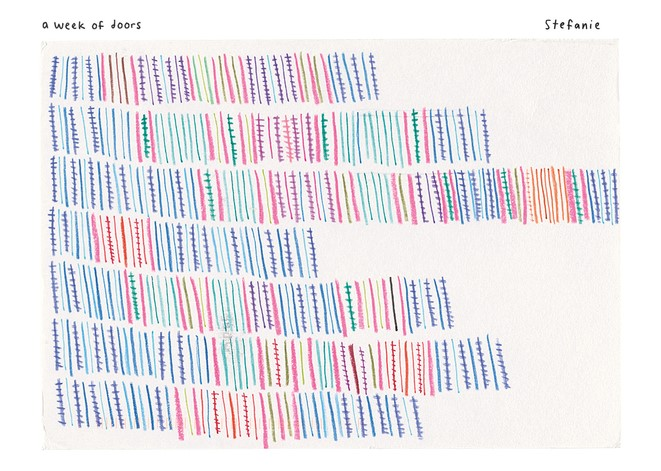<br>
[Image source](http://www.dear-data.com/theproject)<br><br>
Dear Data is now also [a beautiful 300-page book](http://www.dear-data.com/news).

# <span class="title-section w3-xxlarge">Cloud Computing Platforms</span>
<p>Which of the following cloud computing platforms do you use on a regular basis?</p>

In [ ]:
# Cloud computing platforms
# Which of the following cloud computing platforms do you use on a regular basis?
col = 129
result=pd.DataFrame()
for col in range(col, col+12):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    answer = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"answer": answer, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)
    
result = result.query("answer!='None' & answer!='Other'")
result['pct'] = result['amount']*100/result.amount.sum()
result = result.sort_values('amount', ascending=True).reset_index()
result = result.drop('index', axis=1)
temp = result

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 7), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(10)]
color_map[9] = "#E26A2C"
color_map[8] = "#FF8243"
color_map[7] = "#FDA65D"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(-1, 45))
ax0.set(ylim=(-1, 10))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0.scatter(x=temp['pct'], y=temp['answer'], s=65, color=color_map, zorder=3, linewidth=0.3, alpha=0.7)
ax0.grid(which='major', axis='x', zorder=0, color='#CDD0CB', linewidth=0.3, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=8, alpha=0.7)

#data label
y = temp['answer']
z = temp['pct']
n = temp['pct']
for i, txt in enumerate(n):
    txt = f'{z[i]:.1f}%'
    ax0.annotate(txt, (z[i], y[i]), ha='center', va='center', fontsize=2, weight='semibold')

#format axis
ax0.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0.set_ylabel("Platforms",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+1.3, 'Cloud Computing Platforms', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1+.8, "Which of the following cloud computing platforms do you use on a regular basis?", fontsize=3, ha='left', va='top')

# data label
x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

<p>Most of the large cloud providers have jumped in with both feet into the machine learning space. Amazon, Google, IBM, and Microsoft have all added core capabilities for machine learning model development, management, and iteration as well as capabilities for data preparation, engineering, and augmentation. <a href="#f1" id="a6"><sup>[9]</sup></a></p>
<p>Amazon Web Services is the number one of user's cloud platform choice with 31.7%, followed by Google Cloud Platform, 26.8%, Microsoft Azure, 20.9%, and IBM Cloud/Red Hat in the 4th position, with 4.9% far behind the top three.</p>

# <span class="title-section w3-xxlarge">Big Data Products</span>
<p>Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?</p>

In [ ]:
# responses_data['Q33'][0]
# Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?
temp = pd.DataFrame(responses_data.groupby('Q33', dropna=False).size()).reset_index()
temp.columns = ['answer', 'amount']
temp.loc[temp.answer.isna(), 'answer'] = 'None'
temp = temp.query('amount>1')
temp = temp.query("answer!='None' and answer!='Other'")
temp = temp.groupby('answer').sum().reset_index()
temp['pct'] = temp['amount']*100/temp.amount.sum()
temp = temp.sort_values('pct', ascending=False).reset_index()
temp = temp.drop('index', axis=1)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 8), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

##########CLOUDCOMPUTING##########
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['answer'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=6, alpha=0.7)

#format axis
ax0.set_xlabel("Amount",fontsize=3, weight='semibold')
ax0.set_ylabel("Platforms",fontsize=3, weight='semibold', wrap=True)
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1.6, 'Big Data Products', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1-0.8, "Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?", fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<11:
        x1 = -.8
    else:
        x1 = .6
    i+=1
    x = p.get_x() + p.get_width() + x1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.7, weight='semibold') 
    
x_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.xaxis.set_major_formatter(x_format)

plt.show()

The number one favorite database is still MySQL (24.2%), then half percentage of it followed by PostgresSQL (15.1%), and MSSQL (13.3%). Other databases are almost half of percentage of the top three, with MongoDB (7.4%), Oracle Database (6.9%), Google BigQuery (6.5%), and the rest with less than 5%.

# <span class="title-section w3-xxlarge">Cloud Computing and Data Storage Products</span>
<p>1. Do you use any of the following cloud computing products on a regular basis?</p>
<p>2. Do you use any of the following data storage products on a regular basis?</p>

In [ ]:
plt.rcParams['figure.dpi'] = 240
fig = plt.figure(figsize=(8, 2), facecolor='#FEFBF3')
gs = fig.add_gridspec(1, 4)
gs.update(wspace=0.25, hspace=1.5)

# Do you use any of the following cloud computing products on a regular basis?
col = 142
result=pd.DataFrame()
for col in range(col, col+5):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    answer = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"answer": answer, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)

temp1 = result.query("(answer!='No / None') & (answer!='Other')")
temp1 = temp1.groupby('answer').sum().reset_index()
temp1['pct'] = temp1['amount']*100/temp.amount.sum()
temp1 = temp1.sort_values(['pct'], ascending=[False])


##########CLOUDCOMPUTINGPRODUCTS##########
background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(3)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 3))
ax0.set(ylim=(0, 60))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp1['pct'], x=temp1['answer'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 

ax0.text(x0, y1+5, 'Cloud Computing Products', fontsize=4, ha='left', va='top', weight='bold')

# data label
for p in ax0.patches:
    value = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2 
    y = p.get_y() + p.get_height() - 2
    ax0.text(x, y, value, ha='center', va='center', fontsize=3, weight='semibold') 

#format axis
ax0.set_xlabel("",fontsize=4, weight='semibold')
ax0.set_ylabel("Percentage",fontsize=4, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

y_format = ticker.PercentFormatter()
ax0.yaxis.set_major_formatter(y_format)

##########DATASTORAGE##########
# Do you use any of the following data storage products on a regular basis?
col = 147
result=pd.DataFrame()
for col in range(col, col+8):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    answer = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"answer": answer, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)

temp2 = result.groupby('answer').sum().reset_index()
temp2 = temp2.query("amount>1")
temp2['pct'] = temp2['amount']*100/temp.amount.sum()
temp2 = temp2.sort_values(['pct'], ascending=[False])

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(3)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax1 = fig.add_subplot(gs[0, 2])
ax1.set_facecolor(background_color)
ax1.set(xlim=(0, 3))
ax1.set(ylim=(0, 60))
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

#graph
ax1 = sns.barplot(ax=ax1, y=temp2['pct'], x=temp2['answer'], zorder=2, linewidth=0, saturation=0.9, alpha=0.7)
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)

#title
x2, x3 = ax1.get_xlim()
y2, y3 = ax1.get_ylim() 

ax1.text(x2, y3+5, 'Data Storage Products', fontsize=4, ha='left', va='top', weight='bold')

# data label
for p in ax1.patches:
    value = f'{p.get_height():,.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() - 2
    ax1.text(x, y, value, ha='center', va='center', fontsize=3, weight='semibold') 

#format axis
ax1.set_xlabel("",fontsize=4, weight='semibold')
ax1.set_ylabel("",fontsize=4, weight='semibold')
ax1.tick_params(labelsize=3, width=0.3, length=1)
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax1.yaxis.set_ticklabels([])

plt.show()

Amazon is the top choice of cloud computing and data storage products, Amazon Elastic Compute Cloud, (49.4%), and on data storage Amaxon Simple Storage Service, with 50.3%, and almost one third followed by Google Cloud Filestore (16.8%), then Amazon Elastic File System (14.9%).

# <span class="title-section w3-xxlarge">Share EDA</span>
<p>Where do you publicly share your data analysis or machine learning applications?</p>

In [ ]:
# Where do you publicly share your data analysis or machine learning applications?
col = 233
result=pd.DataFrame()
for col in range(col, col+10):
    choice = responses_data.iloc[0:1, col:col+1].to_string()
    answer = choice[choice.find('ce -')+5:len(choice)]
    grouped = responses_data.iloc[:, -1].groupby(responses_data.iloc[:, col])
    data = {"answer": answer, "amount": grouped.size()[0]}
    result = result.append(data, ignore_index=True)

total = result['amount'].sum()
result = result.query("answer!='No / None' and answer!='None' and answer!='Other' and answer!='I do not share my work publicly'")
result['pct'] = result['amount']*100/total
temp = result
temp = temp.sort_values('pct', ascending=False)

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 8), facecolor='#FEFBF3')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#FEFBF3"
color_map = ["#90AACB" for _ in range(75)]
color_map[0] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
ax0.set(xlim=(0, 40))
ax0.set(ylim=(0, 11))
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

#graph
ax0 = sns.barplot(ax=ax0, y=temp['answer'], x=temp['pct'], 
                      zorder=2, linewidth=0, orient='h', saturation=0.9, alpha=0.7)

ax0.grid(which='major', axis='x', zorder=0, color='#CDD0CB', linewidth=0.3, alpha=0.5)
ax0.grid(which='major', axis='y', zorder=0, color='#E8EAE6', linewidth=14, alpha=0.7)

#format axis
ax0.set_xlabel("Percentage",fontsize=3, weight='semibold')
ax0.set_ylabel("Platforms",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.3, length=1)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1-1, 'Share EDA', fontsize=4, ha='left', va='top', weight='bold')
ax0.text(x0, y1-0.6, 'Where do you publicly share your data analysis or machine learning applications?', fontsize=3, ha='left', va='top')

# data label
i=0
for p in ax0.patches:
    value = f'{p.get_width():.1f}%'
    if i<5:
        x1 = -1.2
    else:
        x1 = 1.2
    
    i+=1
    x = p.get_x() + p.get_width() + x1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.5, weight='semibold') 

x_format = ticker.PercentFormatter()
ax0.xaxis.set_major_formatter(x_format)

plt.show()

Github is the number one for open source communities (31%), and Kaggle is not surprisingly, at number two position (20.7%). In this chart, I take out users who do not share their work in the chart (21.4%). How come a Kaggler does not share their work anyway. 

# <span class="title-section w3-xxlarge">Conclusion</span>
<p>
<span class="w3-tag w3-large"><b>The</b></span> state of artificial intelligence is promising, and it is increasingly ready for real-life enterprises. But there are shortages of talent, lack of diversity in the field, and concerns about the handling the data that fuels ever-more-sophisticated algorithms.
"Computer research scientists, software developers, mathematicians, statisticians and data scientists saw an evolution of their employment that is far ahead of the general employed population," Benaich and Hogarth state. "Computer research scientists, software developers, mathematicians, statisticians and data scientists saw an evolution of their employment that is far ahead of the general employed population," Benaich and Hogarth state in the article.
<a href="#f8" id="a10"><sup>[10]</sup></a>
</p>
<p>
India, Brazil, are top of the list countries in ML and AI's talent growth globally. New comer countries showed in the survery are Nigeria, Indonesia, Pakistan, Bangladesh, are filling the ML and AI job market and become Kagglers. The survey does not tell whether Kagglers has helped to their successful carreer, but definitely Kaggle is one of places that provide all you need to learn data science. 
</p>
<p>Kaggle is one of the carreer path options to be an ML and AI professional. It provides all the tools needed to learn and enter to the ML and AI world, for all levels, from beginners to the masters, from young fresh graduate learners to seniors with long experience. A fresh graduate people with zero knowledge can take available courses, learn from other codes, and join competitions. And the competions like this one obviously attract more people to learn data science. The open source world has helped acceleration of new technologies growth faster.</p>
<p>Thanks to all talented people who share their works with others. Without them, we can't get the growth and new inventions of technology at this pace, so we can use and get all the benefits that improve our lives as we have today. Competitions in Kaggle attrack more talented people contribute to the development in data science in particular, and more importantly, the results of analysis that really impact to our life, to the world.</p>
<p>
This notebook would like to show that at Kaggle we can tell more, not only technical part for people who are interested how analysis process is done, learn how the code is written to produce data analysis and visualization, fix if problem found, or help to improve. But at the same time, it can be a very useful platform for non technical, regular people who simply interested in data journalism, and love to read data story telling.</p>

<p><span class="w3-tag"><b>Thank You</b></span> for reading this notebook, your support, your upvote, and feedbacks. My special thanks to all Kagglers and to all open source communities who has shared their works and inspired me to do the same, and give me the opportunities to learn a lot of new things at Kaggle.</p> 
<p>...and, you know it is <span class="w3-tag"><b>FREE</b></span> to click the upvote button. Let me know if you have any feedback at the comment below.</p>

# <span class="title-section w3-xxlarge">References</span>

<span id="f1">1.</span> [The Five Major Platforms For Machine Learning Model Development](https://www.forbes.com/sites/cognitiveworld/2020/12/13/the-five-major-platforms-for-machine-learning-model-development/?sh=2a3d84934e37)<br>
<span id="f2">2.</span> [Google Cloud tools aim to ease machine-learning, cross-cloud analytics](https://www.infoworld.com/article/3637001/google-cloud-tools-aim-to-ease-machine-learning-cross-cloud-analytics.html)<br>
<span id="f3">3.</span> [The 2021 machine learning, AI, and data landscape](https://venturebeat.com/2021/10/16/the-2021-machine-learning-ai-and-data-landscape/)<br>
<span id="f4">4.</span> [The Data and AI landscape 2021: It a MAD, MAD, MAD world](https://www.zdnet.com/article/the-data-and-ai-landscape-2021-it-a-mad-mad-mad-world/)<br>
<span id="f5">5.</span> [Data Science and Machine Learning Platforms Reviews and Ratings](https://www.gartner.com/reviews/market/data-science-machine-learning-platforms)<br>
<span id="f6">6.</span> [Data visualisation by hand: drawing data for your next story](https://datajournalism.com/read/longreads/data-visualisation-by-hand)<br>
<span id="f7">7.</span> [Dear Data](http://www.dear-data.com/theproject)<br>
<span id="f78">8.</span> [Artificial intelligence sees more funding, but needs more people and better data](https://www.zdnet.com/article/artificial-intelligence-sees-more-funding-but-needs-more-people-and-better-data/)<br>
